# Prediction on Alibaba Cloud 2021 Cluster Data (w/ Keras Sequential)

Data

In [2]:
import pandas as pd
import numpy as np
df  = pd.read_csv("bigdata.csv")
dataset = np.array(df)
X = dataset[:, 3] # memory column
Y = dataset[:, 2] # cpu column
ID = dataset[:, 1] # node id column
X = np.asarray(X).astype('float32')
Y = np.asarray(Y).astype('float32')

Plotting the Data

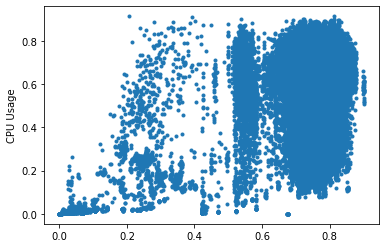

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x=X, y=Y, marker=".")
plt.ylabel("CPU Usage")
plt.show()

Splitting the Data

In [4]:
from sklearn.model_selection import train_test_split

X = X.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

Model : Keras Sequential with Rectified Linear Unit

In [5]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation='relu', input_shape=(None, X_train.shape[1])),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = 'mean_squared_error',
    optimizer = 'SGD',
    metrics = ['mean_squared_error']
)

hist = model.fit(X_train, Y_train, 
                    epochs=10, verbose=1)

Epoch 1/10


2022-10-27 12:50:22.319523: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


4219/4219 [==============================] - 3s 629us/step - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 2/10
4219/4219 [==============================] - 3s 613us/step - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 3/10
4219/4219 [==============================] - 3s 646us/step - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 4/10
4219/4219 [==============================] - 2s 550us/step - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 5/10
4219/4219 [==============================] - 3s 621us/step - loss: 0.0197 - mean_squared_error: 0.0197
Epoch 6/10
4219/4219 [==============================] - 3s 598us/step - loss: 0.0197 - mean_squared_error: 0.0197
Epoch 7/10
4219/4219 [==============================] - 3s 594us/step - loss: 0.0197 - mean_squared_error: 0.0197
Epoch 8/10
4219/4219 [==============================] - 2s 587us/step - loss: 0.0197 - mean_squared_error: 0.0197
Epoch 9/10
4219/4219 [==============================] - 2s 589us/step - loss: 0.0197 - mean_squared

Prediction

In [6]:
Y_predict = model.predict(X_test).ravel()

Plotting the Predicted CPU Usage

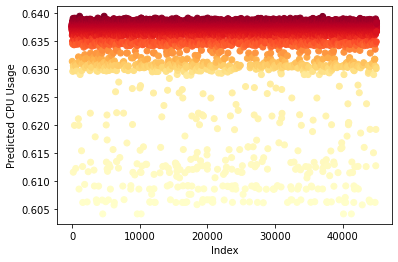

In [7]:
plt.scatter(x=list(range(0, 45000)), y=Y_predict, c=X_test, cmap="YlOrRd")
plt.ylabel("Predicted CPU Usage")
plt.xlabel("Index")
plt.show()

MSE

In [8]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_predict)

0.019527301

Node ID and their Predicted CPU Usage

In [9]:
listY_test = list(Y_test)
listID = list(ID)
listY_predict = list(Y_predict)
tmp = []
# list of node id's in the test set
for i in listY_test:
    tmp.append(listY_test.index(i))
listY_test_id = []
for i in tmp:
    listY_test_id.append(listID[i])
    
# printing node id's and their predicted cpu usage
'''
for i, j in zip(listY_test_id, listY_predict):
    print("Node ID =", i, "Predicted CPU Usage =", j)
'''

'\nfor i, j in zip(listY_test_id, listY_predict):\n    print("Node ID =", i, "Predicted CPU Usage =", j)\n'